In [1]:
# import necessary libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
from pandas.plotting import scatter_matrix

In [2]:
# Load the dataset and display the first 10 rows to inspect the data structure
df = pd.read_csv("teleCust1000t.csv")
df.head(n = 10)

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3
5,2,41,39,0,17,78.0,2,16,0.0,1,1,3
6,3,45,22,1,2,19.0,2,4,0.0,1,5,2
7,2,38,35,0,5,76.0,2,10,0.0,0,3,4
8,3,45,59,1,7,166.0,4,31,0.0,0,5,3
9,1,68,41,1,21,72.0,1,22,0.0,0,3,2


In [3]:
# Generate descriptive statistics (count, mean, std, min, max, quartiles) for all numerical columns
df.describe() 

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
count,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.0220,35.526000,41.684000,0.495000,11.551000,77.535000,2.671000,10.987000,0.047000,0.517000,2.331000,2.487000
std,0.8162,21.359812,12.558816,0.500225,10.086681,107.044165,1.222397,10.082087,0.211745,0.499961,1.435793,1.120306
min,1.0000,1.000000,18.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.0000,17.000000,32.000000,0.000000,3.000000,29.000000,2.000000,3.000000,0.000000,0.000000,1.000000,1.000000
50%,2.0000,34.000000,40.000000,0.000000,9.000000,47.000000,3.000000,8.000000,0.000000,1.000000,2.000000,3.000000
75%,3.0000,54.000000,51.000000,1.000000,18.000000,83.000000,4.000000,17.000000,0.000000,1.000000,3.000000,3.000000
max,3.0000,72.000000,77.000000,1.000000,55.000000,1668.000000,5.000000,47.000000,1.000000,1.000000,8.000000,4.000000


# Customer Telecommunications Dataset

This dataset contains **1,000 entries** and **12 columns**. The goal is to predict the customer category based on demographic and behavioral data.

### 1. Features (Independent Variables)
* **region**: Categorical code for the customer's geographic zone (e.g., Zone 1, 2, or 3).
* **tenure**: Number of months the customer has been with the company.
* **age**: Age of the customer in years.
* **marital**: Marital status (0 = Unmarried, 1 = Married).
* **address**: Number of years lived at current address (Stability indicator).
* **income**: Annual household income (Likely requires scaling/normalization).
* **ed**: Education level (Ranked 1 to 5).
* **employ**: Years with current employer.
* **retire**: Retirement status (0 = Not retired, 1 = Retired).
* **gender**: Gender (0 or 1).
* **reside**: Number of people living in the household.

---

### 2. Target Variable: `custcat`
The **custcat** column is the target for classification, representing four distinct service groups:
1. **Basic Service**
2. **E-Service**
3. **Plus Service**
4. **Total Service**

In [4]:
df['address'].unique()

array([ 9,  7, 24, 12, 17,  2,  5, 21, 10, 14,  8, 30,  3, 38, 19, 18,  0,
       11,  1,  6, 27, 26, 13, 34,  4, 20, 28, 36, 16, 15, 22, 44, 29, 23,
       31, 25, 49, 41, 39, 43, 33, 32, 35, 40, 37, 45, 48, 42, 46, 55],
      dtype=int64)

In [5]:
df['ed'].unique()

array([4, 5, 1, 2, 3], dtype=int64)

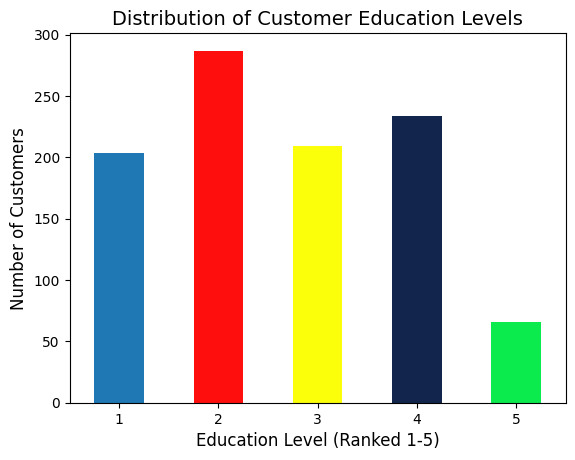

In [6]:
edu_counts = df['ed'].value_counts().sort_index()
plt.figure()
edu_counts.plot(kind = 'bar', color = ['#1f77b4', "#ff0e0e", "#fbff09", "#12264D", "#0beb4e"])
# Adding descriptive titles and labels
plt.title('Distribution of Customer Education Levels', fontsize=14)
plt.xlabel('Education Level (Ranked 1-5)', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)

# Ensure the x-axis labels are horizontal for better readability
plt.xticks(rotation=0)

# Display the plot
plt.show()

In [7]:
df['income'].describe()

count    1000.000000
mean       77.535000
std       107.044165
min         9.000000
25%        29.000000
50%        47.000000
75%        83.000000
max      1668.000000
Name: income, dtype: float64

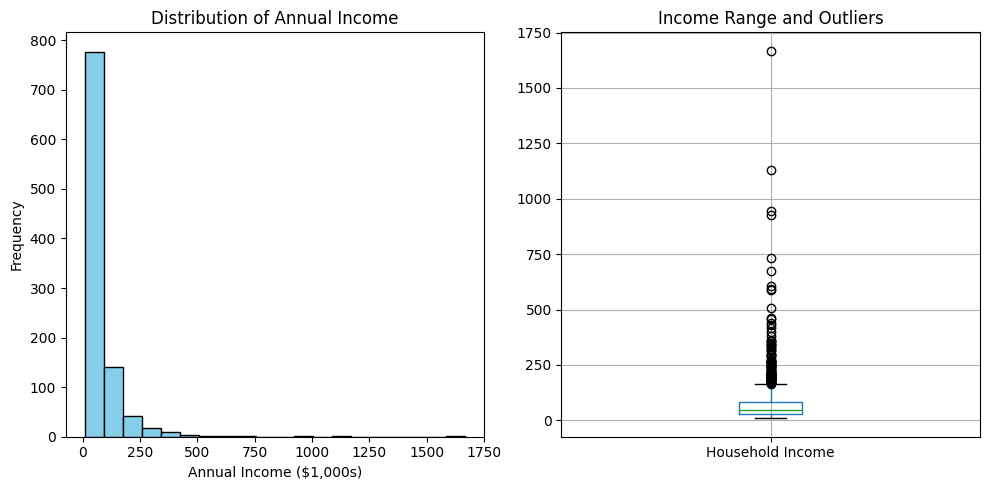

In [8]:
plt.figure(figsize = (10, 5))

# Histogram to see where the data clusters
plt.subplot(1, 2, 1)
plt.hist(df['income'], bins = 20, edgecolor = 'black', color='skyblue')
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income ($1,000s)')
plt.ylabel('Frequency')

# Box plot to clearly identify outliers
plt.subplot(1, 2, 2)
df.boxplot(column = ['income'])
plt.title('Income Range and Outliers')
plt.xticks([1], ['Household Income'])

plt.tight_layout()
plt.show()

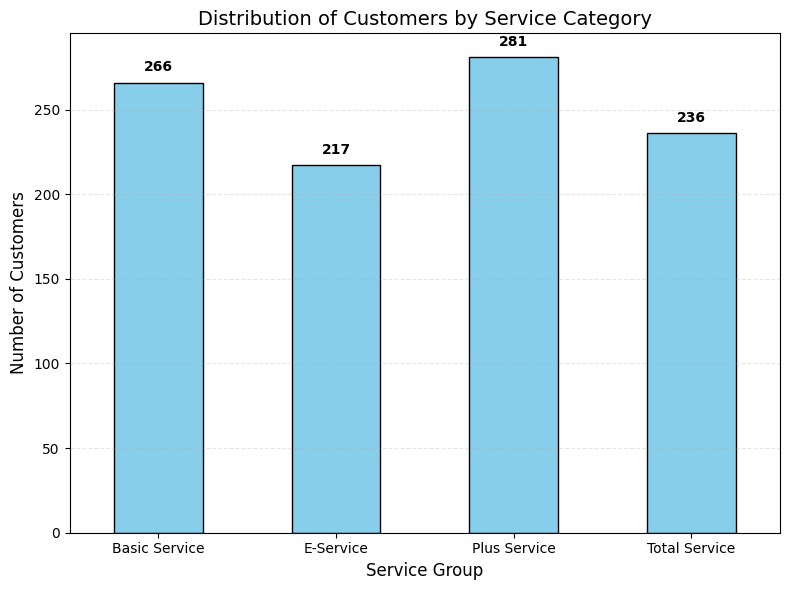

In [10]:
plt.figure(figsize = (8, 6))
# Calculate value counts and plot them as a bar chart
custcat_counts = df['custcat'].value_counts().sort_index(ascending = True)
custcat_counts.plot(kind = 'bar', color = 'skyblue', edgecolor = 'black')

# Labeling
plt.title('Distribution of Customers by Service Category', fontsize=14)
plt.xlabel('Service Group', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)

# Set descriptive labels for the x-axis ticks
plt.xticks(
    ticks=range(len(custcat_counts)), 
    labels=['Basic Service', 'E-Service', 'Plus Service', 'Total Service'], 
    rotation=0
)

# Add counts labels on top of the bars for clarity
for i, count in enumerate(custcat_counts.values):
    plt.text(i, count + 5, str(count), ha = 'center', va = 'bottom', fontweight='bold')

plt.grid(axis = 'y', alpha = 0.3, linestyle='--')
plt.tight_layout()
plt.show()

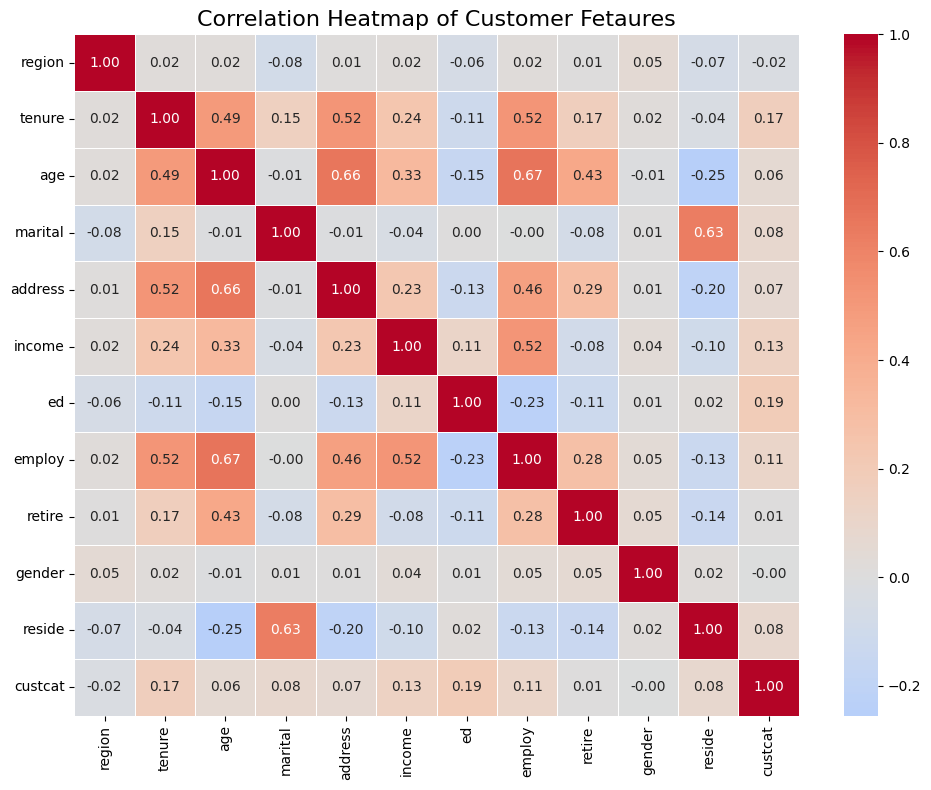

In [12]:
import seaborn as sns
# Calculate the correlation matrix
corr_matrix = df.corr()
plt.figure(figsize = (10, 8))
# Create the heatmap
sns.heatmap(
    corr_matrix,
    annot = True,
    cmap = 'coolwarm',
    fmt = ".2f",
    linewidths = 0.5,
    center = 0
)
plt.title("Correlation Heatmap of Customer Fetaures", fontsize = 16)
plt.tight_layout()
plt.show()

In [14]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Helper function to evaluate SVM
def evaluate_svm(feature_list, label="Model"):
    X = df[feature_list]
    y = df['custcat']
    
    # Standardize data
    X = StandardScaler().fit_transform(X)
    
    # Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
    
    # Train
    model = svm.SVC(kernel='rbf')
    model.fit(X_train, y_train)
    
    # Predict and Score
    yhat = model.predict(X_test)
    acc = accuracy_score(y_test, yhat)
    
    print(f"{label} Accuracy: {acc:.4f}")
    return acc

In [15]:
all_features = ['region', 'tenure', 'age', 'marital', 'address', 
                'income', 'ed', 'employ', 'retire', 'gender', 'reside']

acc_all = evaluate_svm(all_features, "All Features")

All Features Accuracy: 0.3900


In [13]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# 1. Feature Selection (Based on our earlier discussion)
# We exclude 'region', 'gender', and 'reside' if they showed near-zero correlation
X = df[['tenure', 'age', 'marital', 'address', 'income', 'ed', 'employ', 'retire']]
y = df['custcat']

# 2. Data Normalization (Crucial for SVM)
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

# 3. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

# 4. Build and Train the Model
# 'rbf' (Radial Basis Function) is the standard kernel for non-linear data
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)

# 5. Predict
yhat = clf.predict(X_test)

# 6. Evaluation
print(f"Accuracy: {accuracy_score(y_test, yhat):.2f}")
print(classification_report(y_test, yhat))

Accuracy: 0.40
              precision    recall  f1-score   support

           1       0.42      0.63      0.50        51
           2       0.39      0.20      0.27        44
           3       0.40      0.43      0.41        54
           4       0.36      0.29      0.32        51

    accuracy                           0.40       200
   macro avg       0.39      0.39      0.38       200
weighted avg       0.39      0.40      0.38       200



C:\Users\ASUS\AppData\Local\Temp\ipykernel_2776\439561137.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='custcat', y=col, data=df, palette='viridis')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_2776\439561137.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='custcat', y=col, data=df, palette='viridis')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_2776\439561137.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='custcat', y=col, data=df, palette='viridis')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_2776\439561137.py:10: Futur

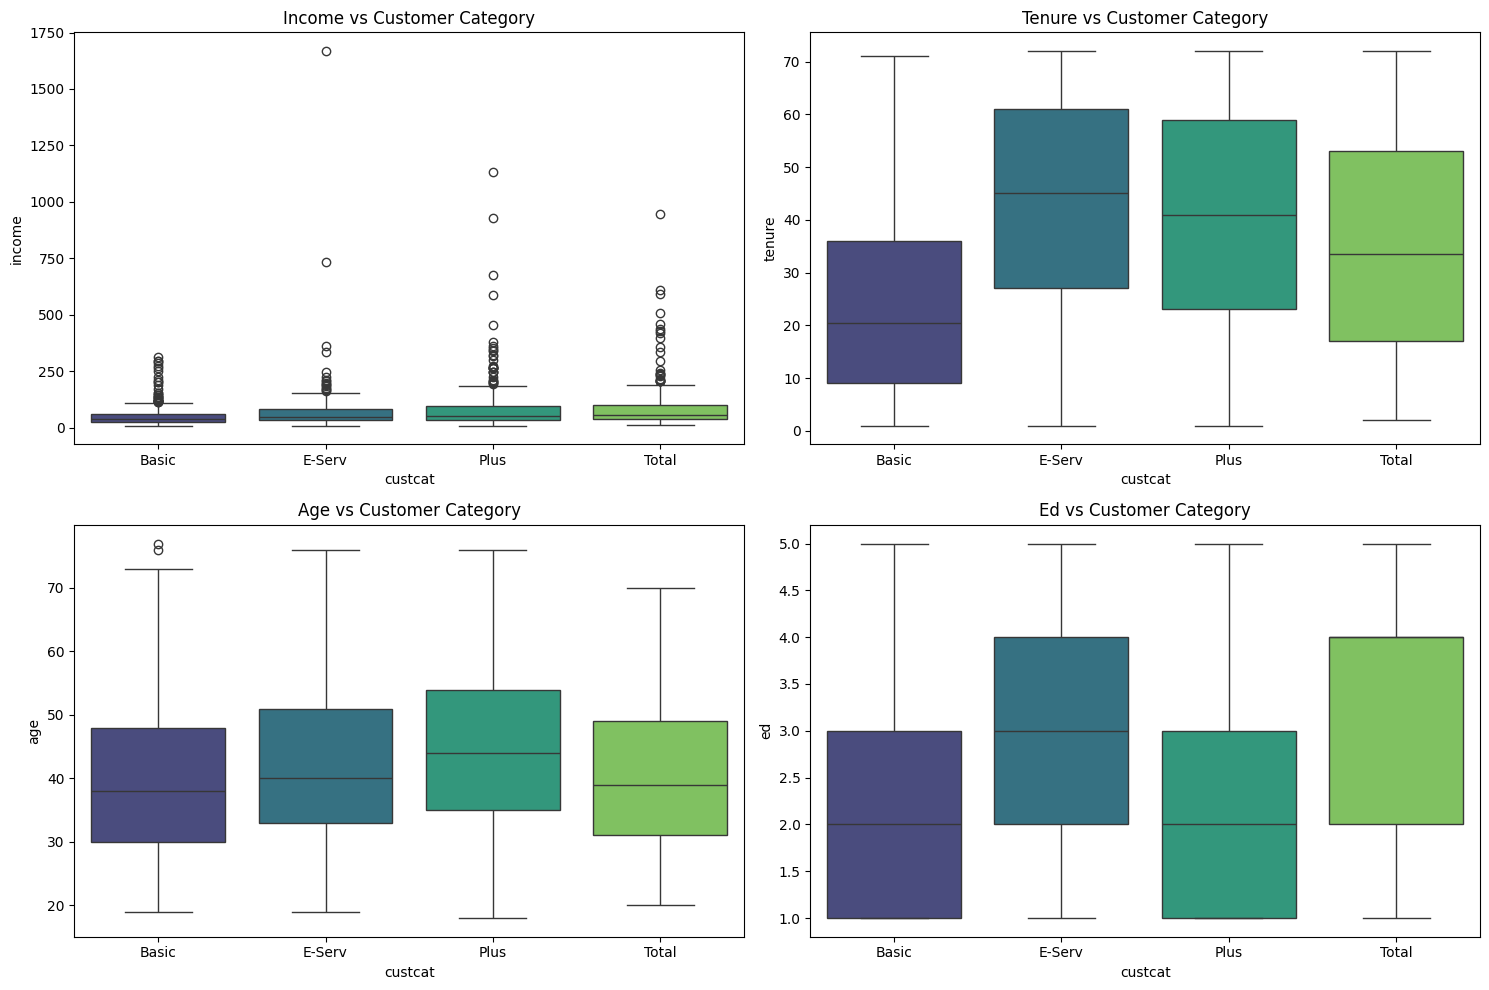

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Features to check
features_to_plot = ['income', 'tenure', 'age', 'ed']

plt.figure(figsize=(15, 10))
for i, col in enumerate(features_to_plot):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='custcat', y=col, data=df, palette='viridis')
    plt.title(f'{col.capitalize()} vs Customer Category')
    plt.xticks(ticks=[0,1,2,3], labels=['Basic', 'E-Serv', 'Plus', 'Total'])

plt.tight_layout()
plt.show()

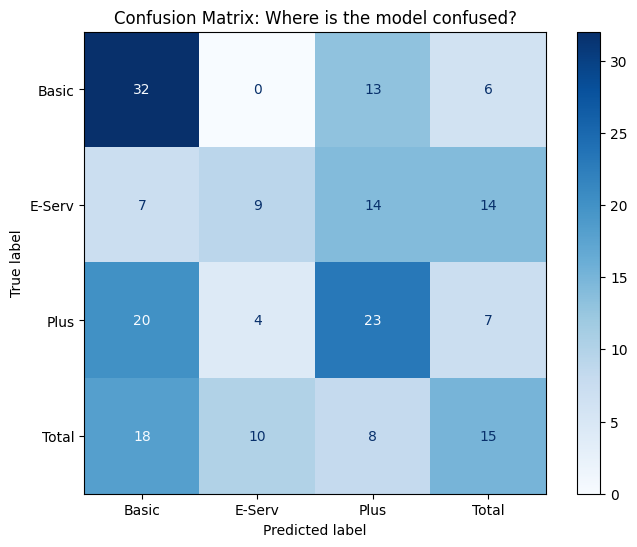

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
cm = confusion_matrix(y_test, yhat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                              display_labels=['Basic', 'E-Serv', 'Plus', 'Total'])

fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax, cmap='Blues')
plt.title('Confusion Matrix: Where is the model confused?')
plt.show()

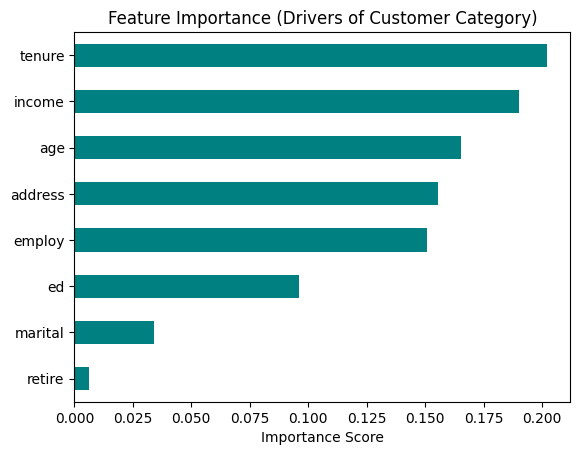

In [20]:
from sklearn.ensemble import RandomForestClassifier

# Use the same features you selected for SVM
X = df[['tenure', 'age', 'marital', 'address', 'income', 'ed', 'employ', 'retire']]
y = df['custcat']

rf = RandomForestClassifier(n_estimators=100, random_state=4)
rf.fit(X, y)

# Plotting
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values()
importances.plot(kind='barh', color='teal')
plt.title('Feature Importance (Drivers of Customer Category)')
plt.xlabel('Importance Score')
plt.show()

In [21]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

# Initialize the Grid Search
grid = GridSearchCV(svm.SVC(), param_grid, refit=True, verbose=1, cv=5)

# Fit the model (this will take a few seconds)
grid.fit(X_train, y_train)

# Print the best parameters found
print(f"Best Parameters: {grid.best_params_}")

# Use the best model to predict
grid_predictions = grid.predict(X_test)
print(f"New Accuracy: {accuracy_score(y_test, grid_predictions):.2f}")

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters: {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
New Accuracy: 0.42


In [22]:
import numpy as np
from sklearn.metrics import classification_report

# 1. Apply Log Transformation to Income
# np.log1p is safer than np.log as it handles zero values if any exist
df['income_log'] = np.log1p(df['income'])

# 2. Update Features
X = df[['tenure', 'age', 'marital', 'address', 'income_log', 'ed', 'employ', 'retire']]
y = df['custcat']

# 3. Standardize and Split (use your existing code)
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

# 4. Final Model using your best found parameters
final_clf = svm.SVC(C=10, gamma=0.001, kernel='rbf')
final_clf.fit(X_train, y_train)

# 5. Full Evaluation
yhat = final_clf.predict(X_test)
print(classification_report(y_test, yhat, 
                            target_names=['Basic', 'E-Service', 'Plus', 'Total']))

              precision    recall  f1-score   support

       Basic       0.39      0.53      0.45        51
   E-Service       0.45      0.11      0.18        44
        Plus       0.37      0.41      0.39        54
       Total       0.47      0.55      0.50        51

    accuracy                           0.41       200
   macro avg       0.42      0.40      0.38       200
weighted avg       0.42      0.41      0.39       200

